# Assignment2
## Anomaly detection 데이터셋을 SVM을 이용해서 판별해보자
### 데이터 분포 : True : 0.17프로 나머지 다 False, Row약 28만행 < 데이터 트레인 시간이 오래걸립니다.(그래도 자고 일어나면 트레이닝 돼있기는 하는정도입니다.!!)
### 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!
### 시간이 없거나 좀 어렵다 하시는 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('../anomaly-detection/creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = data.drop('Class', axis = 1)
y = data['Class'] #target

In [5]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
scaler = StandardScaler() #정규화를 하자!
X = scaler.fit_transform(X) # 스케일링을 해주자!

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

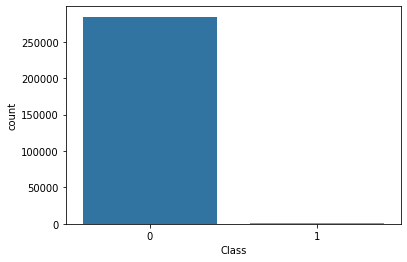

In [8]:
import seaborn as sns

# class 분포 알아보기
sns.countplot(y)
plt.show()

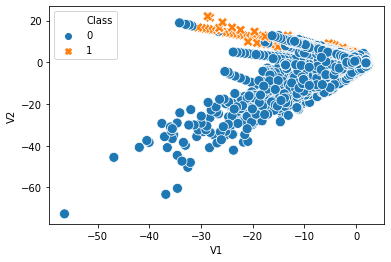

In [9]:
#data 분포를 알아보기 위해 두 column 비교

sns.scatterplot(x='V1', y='V2', hue='Class', style='Class', s=100, data=data)
plt.show()

시각화를 통해 data가 imbalanced한 것을 알 수 있다. 

### Sampling

In [10]:
X

array([[-1.9965832 , -0.69424215, -0.04407525, ...,  0.33089102,
        -0.06378089,  0.24496575],
       [-1.9965832 ,  0.60849438,  0.16117524, ..., -0.02225566,
         0.04460758, -0.34247229],
       [-1.99656215, -0.69350029, -0.81157682, ..., -0.13713664,
        -0.18102037,  1.16068623],
       ...,
       [ 1.6419631 , -0.37412172, -0.03335607, ...,  0.16964061,
        -0.16216315, -0.2541147 ],
       [ 1.64198416,  0.98002119, -0.18243381, ...,  0.01103668,
        -0.08046691, -0.08183739],
       [ 1.64198416, -0.12275615,  0.32124938, ...,  0.26960348,
         0.31668637, -0.31324632]])

sampling전 data의 RangeIndex: 284806, memory usage: 65.2 MB

In [11]:
from imblearn.under_sampling import *

- 오버샘플링(Over-Sampling) : 소수 클래스 데이터를 증가시켜 데이터 비율을 맞춤
- 언더샘플링(Under-Sampling) : 다수 클래스 데이터에서 일부만 사용하여 데이터 비율을 맞춤

- 복합샘플링(Combining Over-and Under-Sampling)

#### Random Under-Sampling
- Random하게 data 추출

random하게 data를 추출하는 방식이기 때문에 높은 정확성을 기대하긴 어렵지만, 속도가 빠르다.

In [12]:
#Random Under-Sampling
X_r_samp, y_r_samp = RandomUnderSampler(random_state=0).fit_sample(X, y)

In [14]:
#X_r_samp.info()

sampling 전 : memory usage: 65.2 MB -> sampling후 : memory usage: 230.8 KB

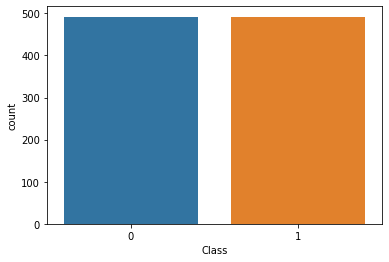

In [15]:
sns.countplot(y_r_samp)
plt.show()

In [16]:
#sampling된 데이터 셋 분리 (80:20)
X_r_samp_train, X_r_samp_test, y_r_samp_train, y_r_samp_test = train_test_split(X_r_samp, y_r_samp, test_size=0.2, random_state=48)

# Evaluation

In [17]:
from sklearn.metrics.pairwise import rbf_kernel 

In [18]:
svc_r=SVC(kernel='linear', C = 100) #linear한 SVM 적용 해보자 에러페널티는 높게주고
svc_r.fit(X_r_samp_train,y_r_samp_train) # 모델 트레이닝 하는 코드

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
from sklearn import metrics
y_pred_r = svc_r.predict(X_r_samp_test)
print('accuracy score :',metrics.accuracy_score(y_r_samp_test,y_pred_r)) #스코어 확인

accuracy score : 0.9390862944162437


In [20]:
svc_r_rbf=SVC(kernel='rbf', gamma = 1) #rbf커널로해보자
svc_r_rbf.fit(X_r_samp_train,y_r_samp_train) # 모델 트레이닝 하는 코드

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
y_pred_r_rbf=svc_r_rbf.predict(X_r_samp_test)
print('accuracy score :',metrics.accuracy_score(y_r_samp_test,y_pred_r_rbf)) #스코어 확인

accuracy score : 0.6700507614213198


linear model의 accuracy가 더 높게 나왔다.

#### 반복문으로 best parameter를 찾아보자

In [22]:
from tqdm import tqdm 
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc_rbf = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc_rbf.fit(X_r_samp_train,y_r_samp_train)
    scores = cross_validate(svc_rbf, X_r_samp, y_r_samp, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|████████████████████████████████████████████████████████████████████████████████| 290/290 [02:02<00:00,  2.36it/s]


0.93997113997114
11.20000000000001


rbf : C = 11.02일 때 accuracy가 0.934로 가장 높았다.

**Scaling을 하고 다시 했더니 정확도가 높아졌다. **

In [23]:

C_range=list(np.arange(1,201,50))
acc_score_linear = []

for c in tqdm(C_range):
    svc_linear = SVC(kernel='linear', C=c)
    svc_linear.fit(X_r_samp_train,y_r_samp_train)
    scores = cross_validate(svc_linear, X_r_samp, y_r_samp, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score_linear.append(score) 
print(np.max(acc_score_linear)) #제일 좋은 결과
print(C_range[np.argmax(acc_score_linear)]) #제일 좋은 결과가 나온 파라미터
#linear원래 이렇게 오래 걸리나

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:12<00:00, 33.01s/it]


0.9400020614306328
151


linear : C가 151일때 accuracy가 94로 가장 높았다.

Text(0, 0.5, 'Accuracy')

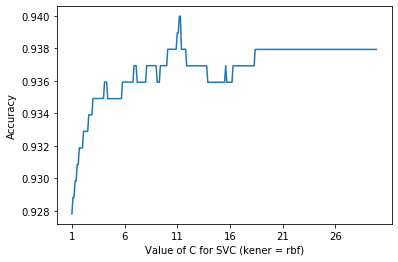

In [30]:
# 각 하이퍼 파라미터 별로 값이 얼만지 그려서 확인해보자
#rbf로 했을 경우
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(1,30,5))
plt.xlabel('Value of C for SVC (kener = rbf)')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

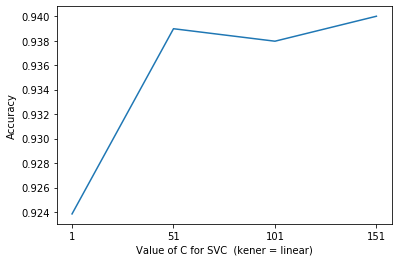

In [31]:
# 각 하이퍼 파라미터 별로 값이 얼만지 그려서 확인해보자
#linear로 했을 경우 
C_range=list(np.arange(1,200,50))
plt.plot(C_range,acc_score_linear)
plt.xticks(np.arange(1,200,50))
plt.xlabel('Value of C for SVC  (kener = linear)')
plt.ylabel('Accuracy')

In [32]:
#rbf : C는 11.02일때 최대값이다
#C_range[np.argmax(acc_score)]

IndexError: list index out of range

In [33]:
#linear : C는 151일때 최대값이다
C_range[np.argmax(acc_score_linear)]

151

#### GridSearch로 best parameter를 찾아보자

In [34]:
tuned_parameters = {
 'C': (np.arange(0,150,10)), 'kernel': ['linear'],
 'C': (np.arange(2,4,0.1)), 'gamma': (np.arange(1,5.1)), 'kernel': ['rbf']
                   }

In [35]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)
# 모델과 tuned parameter를 집어넣음! 그리고 verbose는 진행상황을 나타내주는 파라미터로 크면클수록 정보를많이줌
# 이거 default로 해놓으면 데이터셋 커지면 내 코드가 이상한건지 컴퓨터가 이상한건지 파이썬이 이상한건지 찾기 힘듭니다!

In [36]:
model_svm.fit(X_r_samp_train, y_r_samp_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.646, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.646, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.667, total=   0.1s
[CV] C=2.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=2.0, gamma=1.0, kernel=rbf, score=0.654, total=   0.1s
[CV] C

[CV] ........ C=2.1, gamma=1.0, kernel=rbf, score=0.705, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.1, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=2.1, gamma=2.0, kernel=rbf ....................................
[CV] .

[CV] C=2.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=2.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.2, gamma=3.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.2, gamma=3.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.2, gamma=3.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.2, gamma=3.0, kernel=rbf ....................................
[CV] ........ C=2.2, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C

[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.3000000000000003, gamma=3.0, kernel=rbf .....................
[CV]  C=2.3000000000000003, gamma=3.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.3000000000000003, g

[CV] C=2.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=3.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=3.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.4000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.4000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=2.4000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.4000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=2.4000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.4000000000000004, gamma=4

[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=2.5000000000000004, gamma=4.0, kernel=rbf .....................
[CV]  C=2.5000000000000004, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.5000000000000004, g

[CV] C=2.6000000000000005, gamma=4.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=2.6000000000000005, gamma=4.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=2.6000000000000005, gamma=4.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=4.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.6000000000000005, gamma=5.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.6000000000000005, gamma=5.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.6000000000000005, gamma=5.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.6000000000000005, gamma=5.0, kernel=rbf .....................
[CV]  C=2.6000000000000005, gamma=5

[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.7000000000000006, gamma=5.0, kernel=rbf .....................
[CV]  C=2.7000000000000006, gamma=5.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.7000000000000006, g

[CV] C=2.8000000000000007, gamma=5.0, kernel=rbf .....................
[CV]  C=2.8000000000000007, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=2.8000000000000007, gamma=5.0, kernel=rbf .....................
[CV]  C=2.8000000000000007, gamma=5.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.8000000000000007, gamma=5.0, kernel=rbf .....................
[CV]  C=2.8000000000000007, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=2.8000000000000007, gamma=5.0, kernel=rbf .....................
[CV]  C=2.8000000000000007, gamma=5.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=2.900000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=2.900000000000001, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=2.900000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=2.900000000000001, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=2.900000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=2.900000000000001, gamma=1.0,

[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.646, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.646, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=3.000000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.000000000000001, gamma=1.0, ker

[CV] C=3.100000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=1.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=3.100000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=1.0, kernel=rbf, score=0.667, total=   0.1s
[CV] C=3.100000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=1.0, kernel=rbf, score=0.654, total=   0.1s
[CV] C=3.100000000000001, gamma=1.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=1.0, kernel=rbf, score=0.705, total=   0.1s
[CV] C=3.100000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.100000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.100000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.100000000000001, gamma=2.0, ker

[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=3.200000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.200000000000001, gamma=2.0, ker

[CV] C=3.300000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=2.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=3.300000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=3.300000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=3.300000000000001, gamma=2.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=3.300000000000001, gamma=3.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.300000000000001, gamma=3.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.300000000000001, gamma=3.0, kernel=rbf ......................
[CV]  C=3.300000000000001, gamma=3.0, ker

[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.4000000000000012, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000012, gamma=3

[CV]  C=3.5000000000000013, gamma=3.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.5000000000000013, gamma=3.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.5000000000000013, gamma=3.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=3.5000000000000013, gamma=3.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=3.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=3.5000000000000013, gamma=3.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=3.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=3.5000000000000013, gamma=4.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.5000000000000013, gamma=4.0, kernel=rbf .....................
[CV]  C=3.5000000000000013, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.5000000000000013, g

[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.532, total=   0.2s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.6000000000000014, gamma=4.0, kernel=rbf .....................
[CV]  C=3.6000000000000014, gamma=4

[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.7000000000000015, gamma=4.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.7000000000000015, gamma=4.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.519, total=   0.2s
[CV] C=3.7000000000000015, gamma=4.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.526, total=   0.2s
[CV] C=3.7000000000000015, gamma=4.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=3.7000000000000015, gamma=4.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=4.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=3.7000000000000015, gamma=5.0, kernel=rbf .....................
[CV]  C=3.7000000000000015, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.7000000000000015, g

[CV] C=3.8000000000000016, gamma=4.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=4.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.8000000000000016, gamma=5.0, kernel=rbf .....................
[CV]  C=3.8000000000000016, gamma=5

[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.513, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=3.9000000000000017, gamma=5.0, kernel=rbf .....................
[CV]  C=3.9000000000000017, gamma=5.0, kernel=rbf, score=0.513, total=   0.1s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


0.6380071405387862


In [37]:
print(model_svm.best_params_) # 최고의 결과가 나온 경우

{'C': 2.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [38]:
svm_temp = SVC(kernel = 'rbf', gamma = 1.0, C = 3.0)

In [39]:
svm_temp.fit(X_r_samp_train,y_r_samp_train)
y_pred_temp = svm_temp.predict(X_r_samp_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_r_samp_test,y_pred_temp)) #스코어 확인

Accuracy Score:
0.6751269035532995


Gridsearch로 찾은 parameter는 train set에 최적화된 parameter이다.
이 경우 train set에서 찾은 parameter들을 test set에 적용하였더니 기대한 만큼의 accuracy가 나오지 못했다.

in train:
kener = linear, C = 151일 때의 accuracy = 0.9400020614306328로 가장 높다.